In [2]:
from datasets import load_dataset, load_from_disk, DatasetDict, Dataset
path = "/home/allanz/data/datasets/v3.1_spatial_grid_multimodal"
dataset = load_from_disk(path)


In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'prompt', 'conversations', 'image'],
        num_rows: 100000
    })
    validation: Dataset({
        features: ['text', 'prompt', 'conversations', 'image'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['text', 'prompt', 'conversations', 'image'],
        num_rows: 1000
    })
})

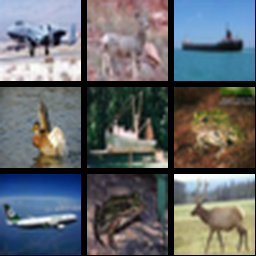

The grid above is size 3 by 3. Each cell contains an object from ['airplane', 'deer', 'ship', 'bird', 'frog'].
What object is in row 2, column 2?A: deer
What object is in row 0, column 0?A: airplane
What object is in row 2, column 0?A: airplane
What object is in row 1, column 1?A: ship
What object is in row 0, column 2?A: ship
What object is in row 2, column 1?A: frog
What object is in row 1, column 2?A: frog
What object is in row 1, column 0?A: bird
What object is in row 0, column 1?A: deer
| airplane | deer | ship |
| bird | ship | frog |
| airplane | frog | deer |
The grid above is size 3 by 3. Each cell contains an object from ['airplane', 'deer', 'ship', 'bird', 'frog'].
What object is in row 2, column 2? A: deer
What object is in row 0, column 0? A: airplane
What object is in row 2, column 0? A: airplane
What object is in row 1, column 1? A: ship
What object is in row 0, column 2? A: ship
What object is in row 2, column 1? A: frog
What object is in row 1, column 2? A: frog
What o

In [4]:
import random
from PIL import Image

randint = random.randint(0, 1000)
display(Image.open(dataset['train'][randint]["image"]))
print(dataset['train'][randint]["prompt"])
for conv in dataset["train"][randint]["conversations"]:
    print(conv[0] + conv[1])
print(dataset['train'][randint]["text"])